In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessionP

/kaggle/input/bowlers-data-2016to2022/final_aggregated_bowler_data.csv
/kaggle/input/batsman-data-2016to2022/final_aggregated_batsman_data.csv


# Obtaining data from csv below which has been cleaned up


In [16]:
import pandas as pd
ipl_batsman_stats_data = pd.read_csv('/kaggle/input/batsman-data-2016to2022/final_aggregated_batsman_data.csv')
ipl_bowler_stats_data =  pd.read_csv('/kaggle/input/bowlers-data-2016to2022/final_aggregated_bowler_data.csv')
advanced_features_batting = ['Player','Mat','Inns','Avg', 'SR', 'BF','4s','6s'] 
advanced_features_bowling = ['Player','Mat','Inns','Avg', 'Econ', 'SR'] 
data_for_clustering_batsman = ipl_batsman_stats_data[advanced_features_batting]
data_for_clustering_bowler = ipl_bowler_stats_data[advanced_features_bowling]
print(data_for_clustering_batsman.head())



           Player  Mat  Inns        Avg          SR    BF   4s   6s
0  Shikhar Dhawan  110   110  38.561429  129.822857  2825  404   82
1     Virat Kohli  100   100  41.030000  130.228571  2618  302  108
2    David Warner   79    79  49.925000  138.330000  2368  327  113
3        KL Rahul   69    67  54.270000  141.684000  2094  258  126
4    Rishabh Pant   98    97  34.004286  146.625714  1918  260  129


# Here, we normalize the data using min-max scaling and then accordingly rank the players based on a Weighted Perfomance Score 


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

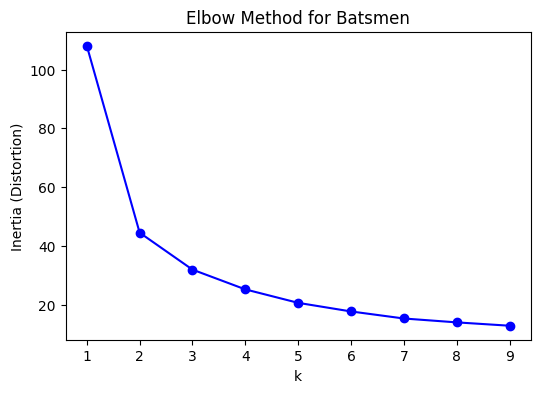

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

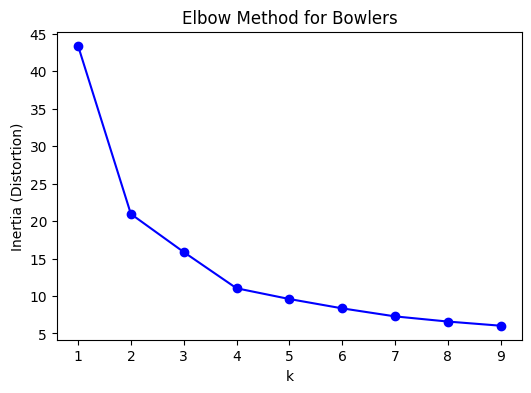

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


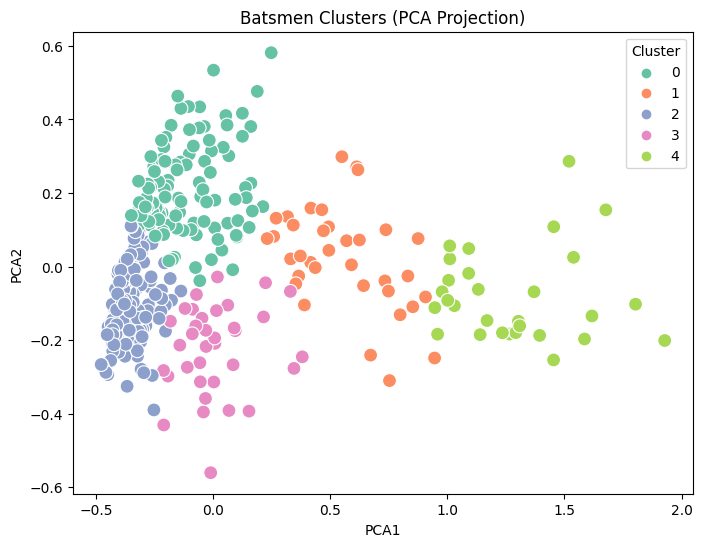

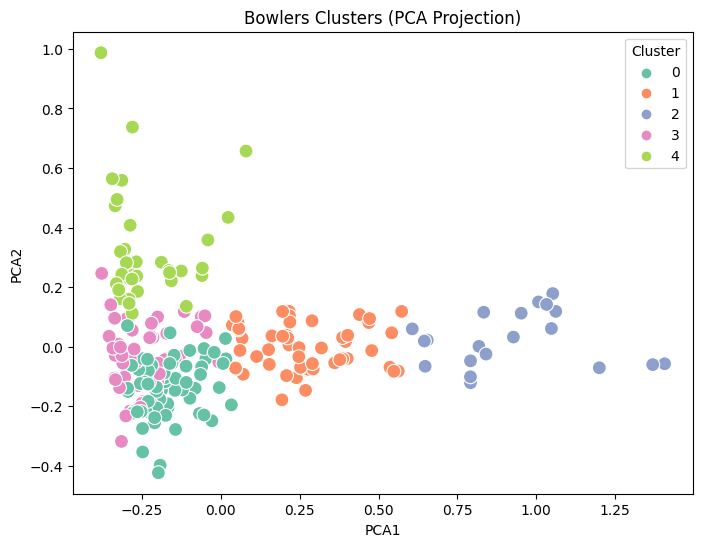

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


ipl_batsman_stats_data = pd.read_csv('/kaggle/input/batsman-data-2016to2022/final_aggregated_batsman_data.csv')
ipl_bowler_stats_data = pd.read_csv('/kaggle/input/bowlers-data-2016to2022/final_aggregated_bowler_data.csv')
ipl_batsman_stats_data = ipl_batsman_stats_data.dropna(subset=advanced_features_batting[1:])
ipl_bowler_stats_data = ipl_bowler_stats_data.dropna(subset=advanced_features_bowling[1:])

advanced_features_batting = ['Mat', 'Inns', 'Avg', 'SR', 'BF', '4s', '6s', 'Runs']
advanced_features_bowling = ['Mat', 'Inns', 'Avg', 'Econ', 'SR', 'Wkts']


scaler = MinMaxScaler()
batting_scaled = scaler.fit_transform(ipl_batsman_stats_data[advanced_features_batting])
bowling_scaled = scaler.fit_transform(ipl_bowler_stats_data[advanced_features_bowling])
def plot_elbow(data, title):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(6,4))
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('k')
    plt.ylabel('Inertia (Distortion)')
    plt.title(f'Elbow Method for {title}')
    plt.show()

plot_elbow(batting_scaled, 'Batsmen')

plot_elbow(bowling_scaled, 'Bowlers')

n_clusters_batsmen = 5
n_clusters_bowlers = 5

kmeans_batsman = KMeans(n_clusters=n_clusters_batsmen, random_state=42)
ipl_batsman_stats_data['Cluster'] = kmeans_batsman.fit_predict(batting_scaled)

kmeans_bowler = KMeans(n_clusters=n_clusters_bowlers, random_state=42)
ipl_bowler_stats_data['Cluster'] = kmeans_bowler.fit_predict(bowling_scaled)

pca = PCA(n_components=2)

batting_pca = pca.fit_transform(batting_scaled)
ipl_batsman_stats_data['PCA1'] = batting_pca[:,0]
ipl_batsman_stats_data['PCA2'] = batting_pca[:,1]

bowling_pca = pca.fit_transform(bowling_scaled)
ipl_bowler_stats_data['PCA1'] = bowling_pca[:,0]
ipl_bowler_stats_data['PCA2'] = bowling_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=ipl_batsman_stats_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Batsmen Clusters (PCA Projection)')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=ipl_bowler_stats_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Bowlers Clusters (PCA Projection)')
plt.show()

ipl_batsman_stats_data.to_csv('/kaggle/working/batsmen_clusters.csv', index=False)
ipl_bowler_stats_data.to_csv('/kaggle/working/bowlers_clusters.csv', index=False)


In [18]:
batsman_cluster_profile = ipl_batsman_stats_data.groupby('Cluster')[advanced_features_batting[1:]].mean()
print("Batsmen Cluster Profiles:")
display(batsman_cluster_profile)

bowler_cluster_profile = ipl_bowler_stats_data.groupby('Cluster')[advanced_features_bowling[1:]].mean()
print("Bowlers Cluster Profiles:")
display(bowler_cluster_profile)


Batsmen Cluster Profiles:


,Inns,Avg,SR,BF,4s,6s,Runs
Cluster,,,,,,,
0,10.403670,21.242503,133.093242,144.394495,16.100917,8.522936,191.440367
1,49.685714,27.081466,129.966171,788.085714,96.371429,42.428571,1057.942857
2,4.354331,4.401213,71.242077,25.244094,1.716535,0.748031,23.448819
3,22.485714,9.390056,95.234971,147.628571,12.828571,6.257143,167.885714
4,81.896552,33.506749,135.608631,1665.620690,203.275862,94.965517,2277.379310


Bowlers Cluster Profiles:


,Inns,Avg,Econ,SR,Wkts
Cluster,,,,,
0,9.308824,25.985368,7.839167,19.813076,9.338235
1,37.500000,34.875544,8.522275,24.339356,37.230769
2,79.250000,31.265852,8.014352,23.394345,81.350000
3,7.113208,38.008302,10.290189,22.506572,6.113208
4,9.264706,68.481275,9.078407,45.340662,4.764706


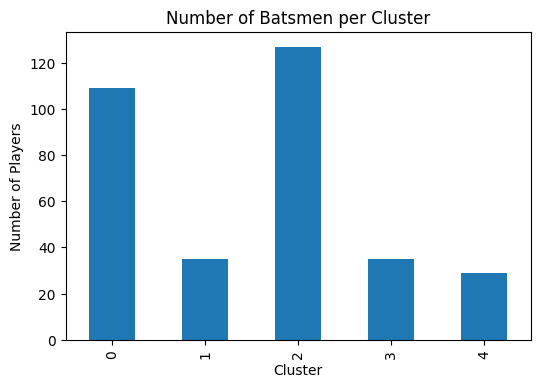

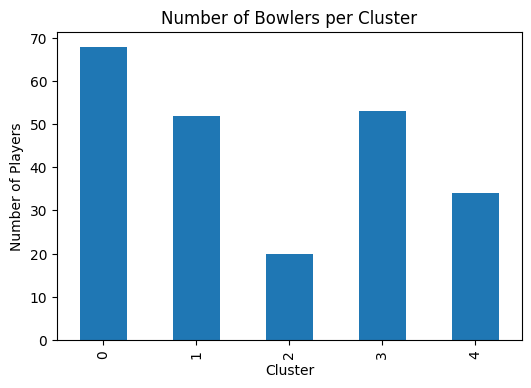

In [19]:
batsman_cluster_counts = ipl_batsman_stats_data['Cluster'].value_counts().sort_index()
batsman_cluster_counts.plot(kind='bar', title='Number of Batsmen per Cluster', figsize=(6,4))
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.show()

bowler_cluster_counts = ipl_bowler_stats_data['Cluster'].value_counts().sort_index()
bowler_cluster_counts.plot(kind='bar', title='Number of Bowlers per Cluster', figsize=(6,4))
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.show()


In [20]:
cluster_to_tier_batsman = {
    0: 'Tier 5 (Low Impact)',
    1: 'Tier 4 (Emerging)',
    2: 'Tier 3 (Consistent Support)',
    3: 'Tier 2 (High Impact)',
    4: 'Tier 1 (Elite)'
}

ipl_batsman_stats_data['Tier'] = ipl_batsman_stats_data['Cluster'].map(cluster_to_tier_batsman)

cluster_to_tier_bowler = {
    0: 'Tier 1',
    1: 'Tier 2',
    2: 'Tier 3',
    3: 'Tier 4',
    4: 'Tier 5'
}

ipl_bowler_stats_data['Tier'] = ipl_bowler_stats_data['Cluster'].map(cluster_to_tier_bowler)


In [21]:
# Batsmen
ipl_batsman_stats_data[['Player', 'Cluster', 'Tier', 'Mat', 'Inns', 'Runs', 'SR', 'Avg']].to_csv('/kaggle/working/batsmen_clustered_tiers.csv', index=False)

# Bowlers
ipl_bowler_stats_data[['Player', 'Cluster', 'Tier', 'Mat', 'Inns', 'Wkts', 'Econ', 'Avg']].to_csv('/kaggle/working/bowlers_clustered_tiers.csv', index=False)
